In [69]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix,mean_squared_error,r2_score,\
root_mean_squared_error,recall_score,roc_auc_score,roc_curve,mean_absolute_error,classification_report,auc

#from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,\
#RandomForestRegressor,VotingRegressor,HistGradientBoostingRegressor

from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,\
RandomForestClassifier,VotingClassifier,HistGradientBoostingClassifier

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df = pd.read_csv('breast-cancer.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

### Malignant == 1 & Bening == 0

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
#df['target_names'] = df['diagnosis'].map({1:'malignant', 0:'bening'})

In [9]:
target_names = ['malignant','bening']

In [12]:
feature_names = df.drop(columns=['id', 'diagnosis'], axis=1)

In [13]:
feature_names = feature_names.columns
feature_names

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'], dtype='object')

In [14]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [15]:
X = df.drop(columns=['id', 'diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [17]:
clf_xgb.score(X_test,y_test)

0.956140350877193

In [18]:
pred = clf_xgb.predict(X_test)
pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [19]:
X_test.head(10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.027010,0.010370,0.01782,0.003586,14.97,24.64,96.05,677.9,0.14260,0.2378,0.2671,0.10150,0.3014,0.08750
70,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.022690,0.013700,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.11930,0.2336,0.2687,0.17890,0.2551,0.06589
131,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.028130,0.010930,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.15460,0.2394,0.3791,0.15140,0.2837,0.08019
431,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.048610,0.011670,0.02187,0.006005,12.88,22.91,89.61,515.8,0.14500,0.2629,0.2403,0.07370,0.2556,0.09359
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.055530,0.014940,0.01840,0.005512,12.26,19.68,78.78,457.8,0.13450,0.2118,0.1797,0.06918,0.2329,0.08134
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.071170,0.016640,0.02324,0.006185,25.74,39.42,184.60,1821.0,0.16500,0.8681,0.9387,0.26500,0.4087,0.12400
369,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,1.0080,0.6999,7.561,130.20,0.003978,0.02821,0.035760,0.014710,0.01518,0.003796,27.66,25.80,195.00,2227.0,0.12940,0.3885,0.4756,0.24320,0.2741,0.08574
29,17.57,15.05,115.00,955.1,0.09847,0.11570,0.09875,0.07953,0.1739,0.06149,0.6003,0.8225,4.655,61.10,0.005627,0.03033,0.034070,0.013540,0.01925,0.003742,20.01,19.52,134.90,1227.0,0.12550,0.2812,0.2489,0.14560,0.2756,0.07919
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.06987,0.1942,0.06902,0.2860,1.0160,1.535,12.96,0.006794,0.03575,0.039800,0.013830,0.02134,0.004603,15.53,23.19,96.66,614.9,0.15360,0.4791,0.4858,0.17080,0.3527,0.10160
477,13.90,16.62,88.97,599.4,0.06828,0.05319,0.02224,0.01339,0.1813,0.05536,0.1555,0.5762,1.392,14.03,0.003308,0.01315,0.009904,0.004832,0.01316,0.002095,15.14,21.80,101.20,718.9,0.09384,0.2006,0.1384,0.06222,0.2679,0.07698


In [20]:
xgb_df = pd.DataFrame(X_test)
xgb_df['prediction'] = pred
xgb_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,0.06373,0.3961,1.0440,2.4970,30.290,0.006953,0.019110,0.027010,0.010370,0.01782,0.003586,14.970,24.64,96.05,677.9,0.14260,0.23780,0.267100,0.10150,0.3014,0.08750,0
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,0.7888,0.7975,5.4860,96.050,0.004444,0.016520,0.022690,0.013700,0.01386,0.001698,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.268700,0.17890,0.2551,0.06589,1
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,0.4743,0.7859,3.0940,48.310,0.006240,0.014840,0.028130,0.010930,0.01397,0.002461,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.379100,0.15140,0.2837,0.08019,1
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,0.1767,1.4600,2.2040,15.430,0.010000,0.032950,0.048610,0.011670,0.02187,0.006005,12.880,22.91,89.61,515.8,0.14500,0.26290,0.240300,0.07370,0.2556,0.09359,0
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,0.2784,1.7680,1.6280,20.860,0.012150,0.041120,0.055530,0.014940,0.01840,0.005512,12.260,19.68,78.78,457.8,0.13450,0.21180,0.179700,0.06918,0.2329,0.08134,0
567,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,0.7260,1.5950,5.7720,86.220,0.006522,0.061580,0.071170,0.016640,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.938700,0.26500,0.4087,0.12400,1
369,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,0.1824,0.06140,1.0080,0.6999,7.5610,130.200,0.003978,0.028210,0.035760,0.014710,0.01518,0.003796,27.660,25.80,195.00,2227.0,0.12940,0.38850,0.475600,0.24320,0.2741,0.08574,1
29,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,0.06149,0.6003,0.8225,4.6550,61.100,0.005627,0.030330,0.034070,0.013540,0.01925,0.003742,20.010,19.52,134.90,1227.0,0.12550,0.28120,0.248900,0.14560,0.2756,0.07919,1
81,13.340,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,0.06902,0.2860,1.0160,1.5350,12.960,0.006794,0.035750,0.039800,0.013830,0.02134,0.004603,15.530,23.19,96.66,614.9,0.15360,0.47910,0.485800,0.17080,0.3527,0.10160,1
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,0.05536,0.1555,0.5762,1.3920,14.030,0.003308,0.013150,0.009904,0.004832,0.01316,0.002095,15.140,21.80,101.20,718.9,0.09384,0.20060,0.138400,0.06222,0.2679,0.07698,0


### LightGBM

In [1]:
import optuna

In [21]:
# 3. Feature scaling - not always necessary for tree-based models, but can help
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# 4. Baseline model
baseline_model = LGBMClassifier(random_state=42, force_col_wise=True)
baseline_model.fit(X_train_scaled, y_train)
baseline_preds = baseline_model.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_preds)
print(f"Baseline model accuracy: {baseline_accuracy:.4f}")

[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [33]:
# 5. Hyperparameter tuning with Optuna
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0)
    }
    
    lgbm = LGBMClassifier(**params, random_state=42)
    
    # Use cross-validation to evaluate
    cv_scores = cross_val_score(lgbm, X_train_scaled, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

In [ ]:
# Create and run study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

In [ ]:
# Print results
print("Best parameters:", study.best_params)
print("Best cross-validation score:", study.best_value)

In [ ]:
# 6. Train final model with best parameters
best_params = study.best_params
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

In [ ]:
# 7. Evaluate final model
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# 9. Feature Importance
feature_importance = best_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(data.feature_names)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [ ]:
# 10. Save the model
import joblib
joblib.dump(best_model, 'best_lgbm_model.pkl')

## DecisionTreeClassifier

In [23]:
# Define parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Create model
dec_tree = DecisionTreeClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(dec_tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Best model
best_dt = grid_search.best_estimator_
print(best_dt)

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation score: 0.9429
DecisionTreeClassifier(criterion='entropy', min_samples_split=10,
                       random_state=42)


In [24]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [25]:
dec_tree.score(X_test,y_test)

0.9473684210526315

In [28]:
dt_pred = dec_tree.predict(X_test)
dt_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [29]:
dec_tree_df = pd.DataFrame(X_test)
dec_tree_df['prediction'] = dt_pred
dec_tree_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.080050,0.038210,0.1925,0.06373,0.3961,1.0440,2.4970,30.290,0.006953,0.019110,0.027010,0.010370,0.01782,0.003586,14.970,24.64,96.05,677.9,0.14260,0.23780,0.267100,0.10150,0.3014,0.08750,0
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,0.7888,0.7975,5.4860,96.050,0.004444,0.016520,0.022690,0.013700,0.01386,0.001698,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.268700,0.17890,0.2551,0.06589,1
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.146600,0.080870,0.1931,0.05796,0.4743,0.7859,3.0940,48.310,0.006240,0.014840,0.028130,0.010930,0.01397,0.002461,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.379100,0.15140,0.2837,0.08019,1
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,0.1767,1.4600,2.2040,15.430,0.010000,0.032950,0.048610,0.011670,0.02187,0.006005,12.880,22.91,89.61,515.8,0.14500,0.26290,0.240300,0.07370,0.2556,0.09359,0
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.067370,0.025940,0.1818,0.06782,0.2784,1.7680,1.6280,20.860,0.012150,0.041120,0.055530,0.014940,0.01840,0.005512,12.260,19.68,78.78,457.8,0.13450,0.21180,0.179700,0.06918,0.2329,0.08134,0
567,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,0.2397,0.07016,0.7260,1.5950,5.7720,86.220,0.006522,0.061580,0.071170,0.016640,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.938700,0.26500,0.4087,0.12400,1
369,22.010,21.90,147.20,1482.0,0.10630,0.19540,0.244800,0.150100,0.1824,0.06140,1.0080,0.6999,7.5610,130.200,0.003978,0.028210,0.035760,0.014710,0.01518,0.003796,27.660,25.80,195.00,2227.0,0.12940,0.38850,0.475600,0.24320,0.2741,0.08574,1
29,17.570,15.05,115.00,955.1,0.09847,0.11570,0.098750,0.079530,0.1739,0.06149,0.6003,0.8225,4.6550,61.100,0.005627,0.030330,0.034070,0.013540,0.01925,0.003742,20.010,19.52,134.90,1227.0,0.12550,0.28120,0.248900,0.14560,0.2756,0.07919,1
81,13.340,15.86,86.49,520.0,0.10780,0.15350,0.116900,0.069870,0.1942,0.06902,0.2860,1.0160,1.5350,12.960,0.006794,0.035750,0.039800,0.013830,0.02134,0.004603,15.530,23.19,96.66,614.9,0.15360,0.47910,0.485800,0.17080,0.3527,0.10160,1
477,13.900,16.62,88.97,599.4,0.06828,0.05319,0.022240,0.013390,0.1813,0.05536,0.1555,0.5762,1.3920,14.030,0.003308,0.013150,0.009904,0.004832,0.01316,0.002095,15.140,21.80,101.20,718.9,0.09384,0.20060,0.138400,0.06222,0.2679,0.07698,0


## KNeighborsClassifier

In [31]:
# Set random seed for reproducibility
np.random.seed(42)

In [32]:
# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('knn', KNeighborsClassifier())
])

In [33]:
# 1. Basic KNN with default parameters
print("\n--- Basic KNN with default parameters ---")
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


--- Basic KNN with default parameters ---
Accuracy: 0.9474


In [34]:
# 2. Exploring the impact of different k values
print("\n--- Exploring different k values ---")
k_values = list(range(1, 31, 2))  # Odd numbers from 1 to 30
cv_scores = []

for k in k_values:
    pipeline.set_params(knn__n_neighbors=k)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"k={k}: Cross-validation accuracy = {scores.mean():.4f}")


--- Exploring different k values ---
k=1: Cross-validation accuracy = 0.9429
k=3: Cross-validation accuracy = 0.9604
k=5: Cross-validation accuracy = 0.9604
k=7: Cross-validation accuracy = 0.9560
k=9: Cross-validation accuracy = 0.9516
k=11: Cross-validation accuracy = 0.9560
k=13: Cross-validation accuracy = 0.9582
k=15: Cross-validation accuracy = 0.9538
k=17: Cross-validation accuracy = 0.9560
k=19: Cross-validation accuracy = 0.9560
k=21: Cross-validation accuracy = 0.9538
k=23: Cross-validation accuracy = 0.9538
k=25: Cross-validation accuracy = 0.9538
k=27: Cross-validation accuracy = 0.9516
k=29: Cross-validation accuracy = 0.9516


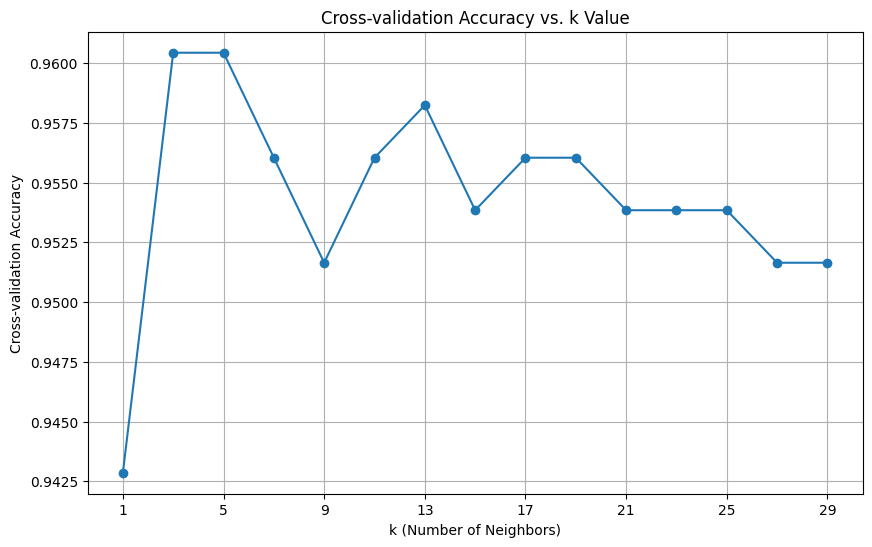


Best k value from cross-validation: 5


In [35]:
# Plot the CV scores vs k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-validation Accuracy vs. k Value')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-validation Accuracy')
plt.grid(True)
plt.xticks(k_values[::2])  # Show every other k value on x-axis
plt.show()
best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest k value from cross-validation: {best_k}")

In [36]:
# 3. Comprehensive GridSearch for hyper-parameter tuning
print("\n--- Comprehensive Grid Search ---")
param_grid = {
    'knn__n_neighbors': list(range(1, 21, 2)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__p': [1, 2]  # p=1 for manhattan, p=2 for euclidean
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


--- Comprehensive Grid Search ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits

Best parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}
Best cross-validation score: 0.9648


In [37]:
# 4. Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n--- Final Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


--- Final Evaluation on Test Set ---
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        71
      bening       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



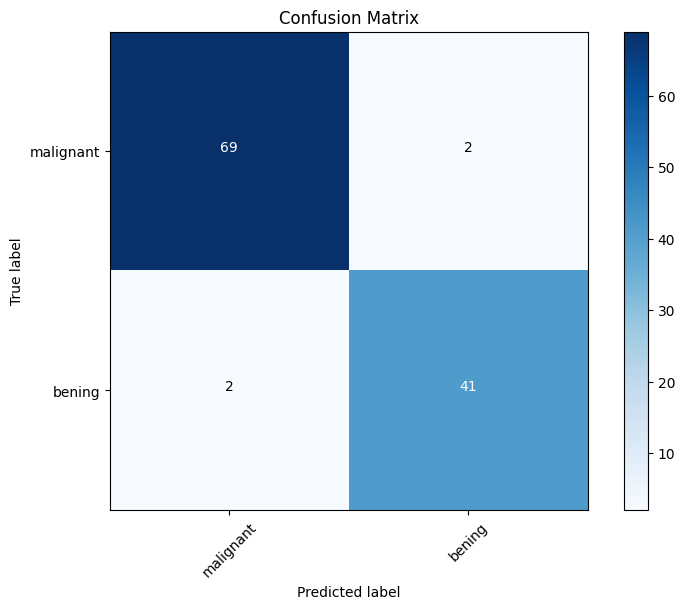

In [38]:
# 5. Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)

thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [39]:
# 6. Feature importance analysis for KNN
# KNN doesn't have built-in feature importance, so let's use a simple approach
# looking at per-feature accuracy
print("\n--- Feature Importance Analysis ---")

# Get the best k value from grid search
best_k = grid_search.best_params_['knn__n_neighbors']

# Create a scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize list to store feature importances
feature_importance = []

# For each feature, create a model using only that feature
for i in range(X.shape[1]):
    # Extract single feature
    X_train_single = X_train_scaled[:, i:i+1]
    X_test_single = X_test_scaled[:, i:i+1]
    
    # Create and fit KNN model
    knn = KNeighborsClassifier(n_neighbors=best_k)
    knn.fit(X_train_single, y_train)
    
    # Predict and calculate accuracy
    y_pred = knn.predict(X_test_single)
    acc = accuracy_score(y_test, y_pred)
    feature_importance.append((feature_names[i], acc))

# Sort features by importance
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Display top 10 most important features
print("Top 10 most important features:")
for feature, importance in feature_importance[:10]:
    print(f"{feature}: {importance:.4f}")


--- Feature Importance Analysis ---
Top 10 most important features:
perimeter_mean: 0.9211
area_mean: 0.9211
area_se: 0.9211
perimeter_worst: 0.9211
radius_mean: 0.9123
concavity_mean: 0.9123
radius_worst: 0.9123
area_worst: 0.9123
concave points_worst: 0.9035
concave points_mean: 0.8860


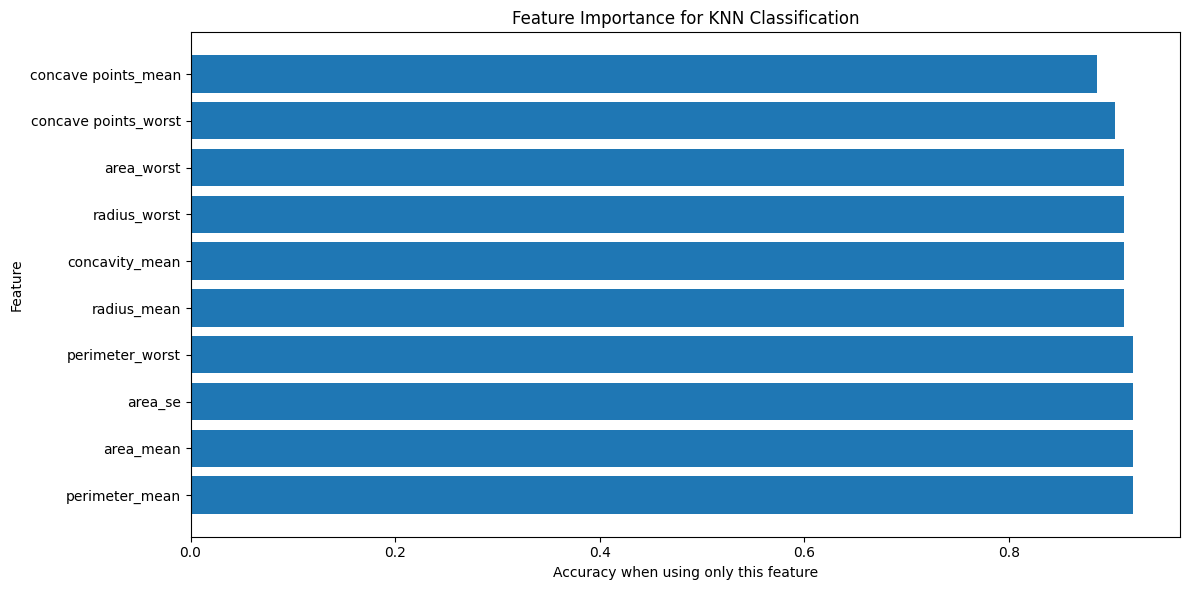


KNN Tuning Complete!


In [40]:
# Plot feature importance
top_features = feature_importance[:10]
plt.figure(figsize=(12, 6))
plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
plt.xlabel('Accuracy when using only this feature')
plt.ylabel('Feature')
plt.title('Feature Importance for KNN Classification')
plt.tight_layout()
plt.show()
print("\nKNN Tuning Complete!")

## LogisticRegression

In [41]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Filter convergence warnings for cleaner output
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [42]:
# Set random seed for reproducibility
np.random.seed(42)

# Load the breast cancer dataset (binary classification)
#data = load_breast_cancer()
#X = data.data
#y = data.target
#feature_names = data.feature_names
#target_names = data.target_names

#print(f"Dataset shape: {X.shape}")
#print(f"Features: {len(feature_names)}")
#print(f"Classes: {target_names}")
#print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42))  # Logistic regression model
])

# Basic model with default parameters
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the basic model
print("\n--- Basic Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


--- Basic Model Performance ---
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.99      0.98        71
      bening       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[70  1]
 [ 2 41]]


In [44]:
# Hyperparameter tuning with GridSearchCV
print("\n--- Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__solver': ['liblinear', 'saga'],  # Algorithm to use
    'classifier__max_iter': [2000, 5000, 10000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']  # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")


--- Hyperparameter Tuning ---
Fitting 5 folds for each of 144 candidates, totalling 720 fits


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The ma


Best Parameters: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__max_iter': 2000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Cross-Validation Score: 0.9780


In [45]:
# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("\n--- Tuned Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=target_names))


--- Tuned Model Performance ---
Accuracy: 0.9912

Classification Report:
              precision    recall  f1-score   support

   malignant       0.99      1.00      0.99        71
      bening       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [46]:
# Compare basic and tuned models
print("\n--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")


--- Model Comparison ---
Basic Model Accuracy: 0.9737
Tuned Model Accuracy: 0.9912


In [47]:
# Calculate cross-validation scores for both models
cv_scores_basic = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"\nBasic Model Cross-Validation Scores: {cv_scores_basic}")
print(f"Basic Model Average CV Score: {cv_scores_basic.mean():.4f} ± Standard Deviation: {cv_scores_basic.std():.4f}")
print(f"\nTuned Model Cross-Validation Scores: {cv_scores_tuned}")
print(f"Tuned Model Average CV Score: {cv_scores_tuned.mean():.4f} ± Standard Deviation: {cv_scores_tuned.std():.4f}")


Basic Model Cross-Validation Scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Basic Model Average CV Score: 0.9807 ± Standard Deviation: 0.0065

Tuned Model Cross-Validation Scores: [0.98245614 0.98245614 0.98245614 0.97368421 0.99115044]
Tuned Model Average CV Score: 0.9824 ± Standard Deviation: 0.0055


In [49]:
# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('roc_curve_comparison.png')
plt.close()

In [50]:
# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=feature_names,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.close()
    
    print("\n--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("\n--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))


--- Top 10 Most Important Features ---
                      Coefficient
texture_worst            0.580095
radius_worst             0.497651
radius_se                0.494552
concave points_mean      0.479329
area_worst               0.479280
symmetry_worst           0.468966
concave points_worst     0.447889
perimeter_worst          0.442565
concavity_worst          0.399543
texture_mean             0.398598

--- Bottom 10 Least Important Features ---
                        Coefficient
smoothness_se              0.084735
concave points_se          0.070860
symmetry_mean              0.028115
compactness_mean          -0.024754
texture_se                -0.029907
concavity_se              -0.073278
symmetry_se               -0.146361
fractal_dimension_mean    -0.160351
fractal_dimension_se      -0.245622
compactness_se            -0.268073


In [51]:
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png')
plt.close()

print("\nAnalysis complete! The tuned model performance metrics, ROC curve, feature importance, and learning curve have been generated.")


Analysis complete! The tuned model performance metrics, ROC curve, feature importance, and learning curve have been generated.


## AdaBoostClassifier

In [52]:
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
#np.random.seed(42)

# Load the breast cancer dataset
#data = load_breast_cancer()
#X = data.data
#y = data.target

# Print dataset information
#print(f"Dataset shape: {X.shape}")
#print(f"Number of features: {X.shape[1]}")
#print(f"Number of classes: {len(np.unique(y))}")
#print(f"Class distribution: {np.bincount(y)}")

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Basic AdaBoost model with default parameters
print("\n--- Basic AdaBoost Model ---")
base_model = AdaBoostClassifier(random_state=42)
base_model.fit(X_train_scaled, y_train)
y_pred = base_model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Basic AdaBoost Model ---
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [56]:
# Grid search for hyperparameter tuning
print("\n--- Grid Search for Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 3, 5]
}

# Create base estimator
base_estimator = DecisionTreeClassifier(random_state=42)

# Create AdaBoost model
adaboost = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Create grid search
grid_search = GridSearchCV(
    estimator=adaboost,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Print best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


--- Grid Search for Hyperparameter Tuning ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters: {'estimator__max_depth': 1, 'learning_rate': 1.0, 'n_estimators': 50}
Best cross-validation score: 0.9802


In [57]:
# Train model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

In [58]:
# Make predictions
y_pred_best = best_model.predict(X_test_scaled)
print(f"\nTest accuracy with best model: {accuracy_score(y_test, y_pred_best):.4f}")


Test accuracy with best model: 0.9649



--- Feature Importances ---


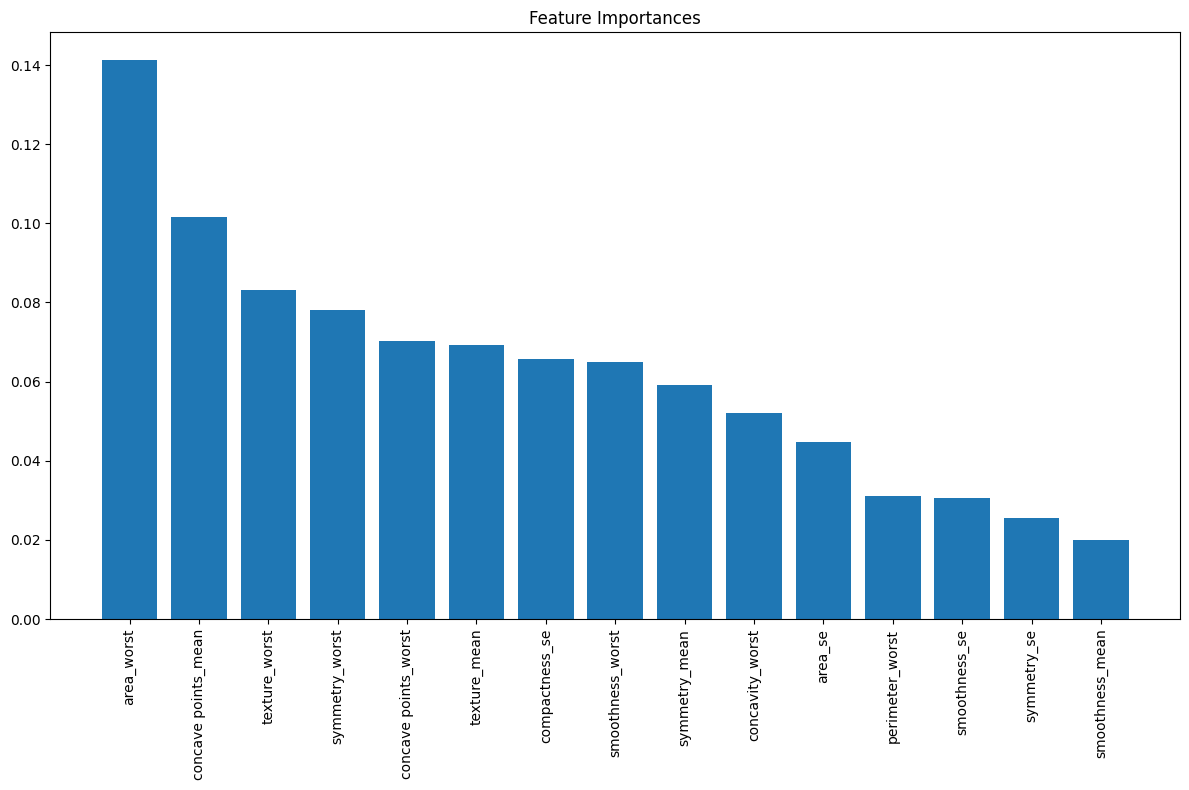

In [60]:
# Visualize feature importances
def plot_feature_importance(model, feature_names):
    # For AdaBoost, feature_importances_ is available after fitting
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        # For pipeline, need to access the classifier
        importances = model.named_steps['adaboost'].feature_importances_
    
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 8))
    plt.title('Feature Importances')
    plt.bar(range(len(indices[:15])), importances[indices[:15]], align='center')
    plt.xticks(range(len(indices[:15])), [feature_names[i] for i in indices[:15]], rotation=90)
    plt.tight_layout()
    plt.show()

print("\n--- Feature Importances ---")
plot_feature_importance(best_model, feature_names)


--- Confusion Matrix ---


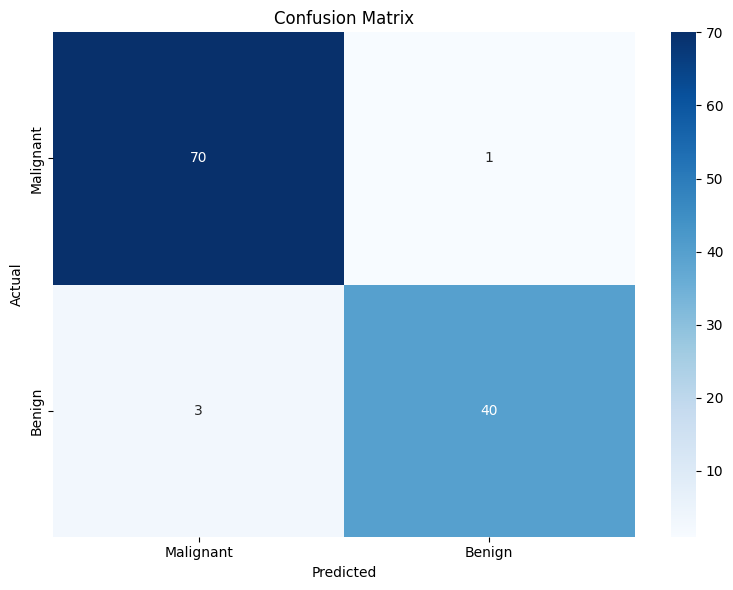

In [61]:
# Visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

print("\n--- Confusion Matrix ---")
plot_confusion_matrix(y_test, y_pred_best, ['Malignant', 'Benign'])


--- ROC Curve ---


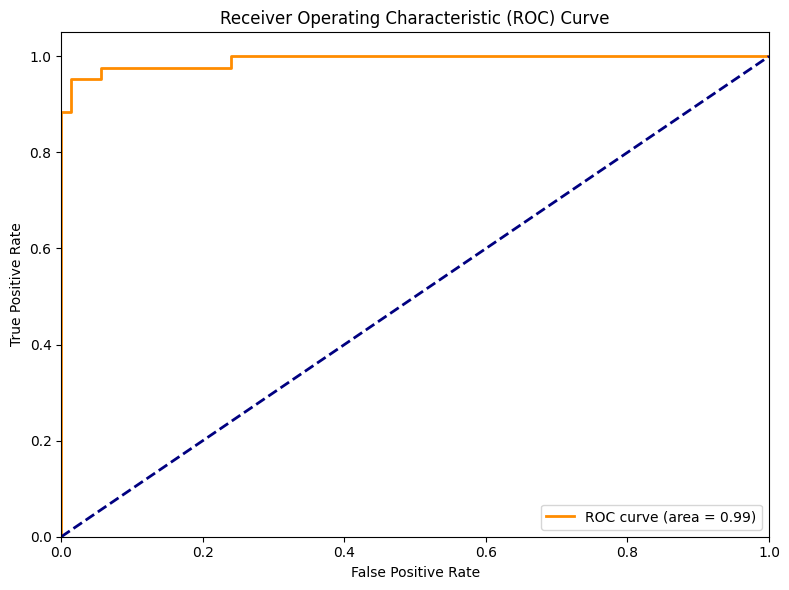

In [62]:
# ROC curve
def plot_roc_curve(model, X, y):
    y_score = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

print("\n--- ROC Curve ---")
plot_roc_curve(best_model, X_test_scaled, y_test)


--- Learning Curve ---


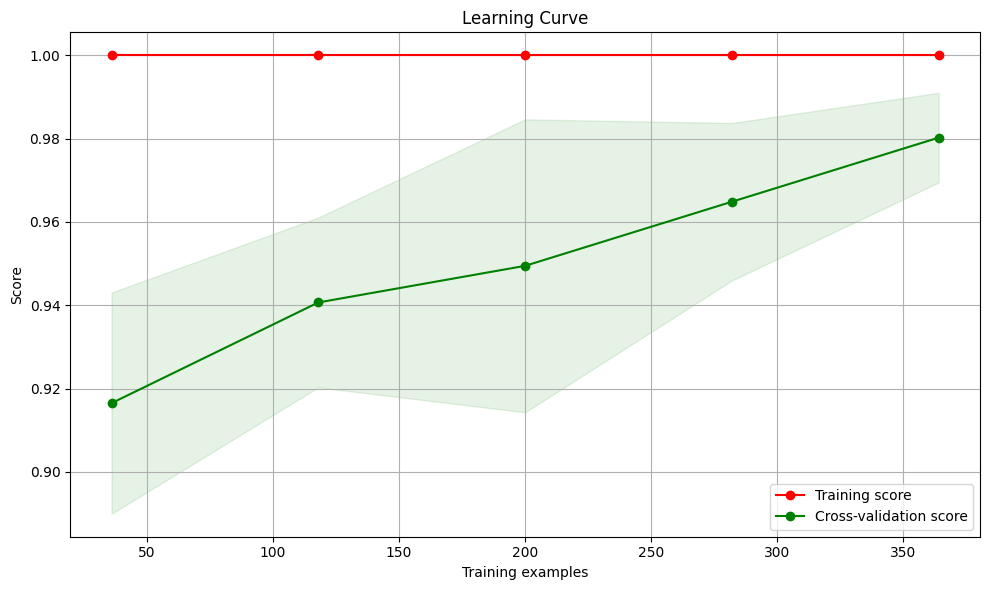

In [63]:
# Learning curve
def plot_learning_curve(estimator, X, y, title="Learning Curve", ylim=None, cv=5, n_jobs=-1):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

print("\n--- Learning Curve ---")
plot_learning_curve(best_model, X_train_scaled, y_train)


--- Effect of Learning Rate ---


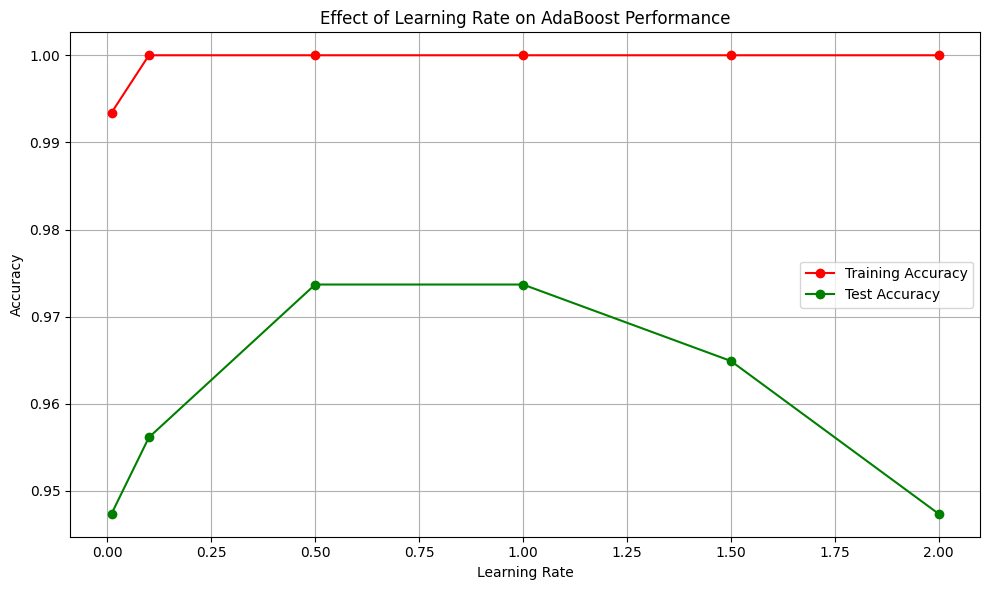

In [64]:
# Effect of different learning rates
def plot_learning_rate_effect():
    learning_rates = [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
    train_scores = []
    test_scores = []
    
    for lr in learning_rates:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=100,
            learning_rate=lr,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(learning_rates, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(learning_rates, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Learning Rate')
    plt.ylabel('Accuracy')
    plt.title('Effect of Learning Rate on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Learning Rate ---")
plot_learning_rate_effect()


--- Effect of Number of Estimators ---


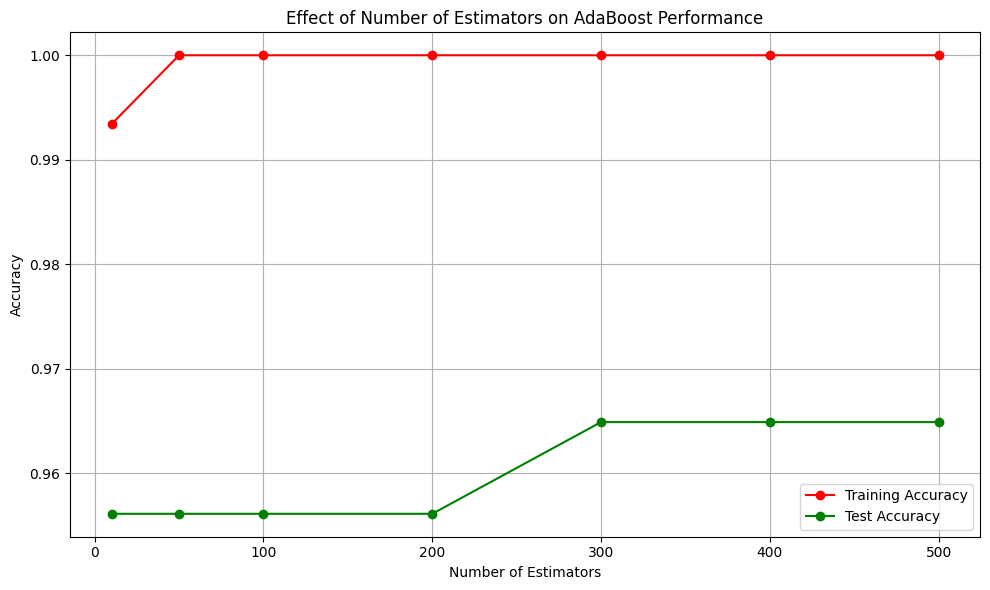

In [65]:
# Effect of number of estimators
def plot_n_estimators_effect():
    n_estimators_range = [10, 50, 100, 200, 300, 400, 500]
    train_scores = []
    test_scores = []
    
    for n_est in n_estimators_range:
        model = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=3),
            n_estimators=n_est,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_train_scaled, y_train)
        train_scores.append(accuracy_score(y_train, model.predict(X_train_scaled)))
        test_scores.append(accuracy_score(y_test, model.predict(X_test_scaled)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(n_estimators_range, train_scores, 'o-', color='r', label='Training Accuracy')
    plt.plot(n_estimators_range, test_scores, 'o-', color='g', label='Test Accuracy')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.title('Effect of Number of Estimators on AdaBoost Performance')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n--- Effect of Number of Estimators ---")
plot_n_estimators_effect()

In [70]:
# Pipeline example with AdaBoost
print("\n--- Pipeline with AdaBoost ---")
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('adaboost', AdaBoostClassifier(random_state=42))
])

# Parameters for pipeline
pipeline_params = {
    'adaboost__estimator': [DecisionTreeClassifier(max_depth=1, random_state=42),
                           DecisionTreeClassifier(max_depth=3, random_state=42)],
    'adaboost__n_estimators': [50, 100, 200],
    'adaboost__learning_rate': [0.01, 0.1, 1.0]
}

# Randomized search to speed up the tuning process
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=pipeline_params,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit randomized search
random_search.fit(X_train, y_train)  # Note: Using unscaled data since scaling is part of the pipeline

# Print best parameters
print(f"Best pipeline parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_:.4f}")


--- Pipeline with AdaBoost ---
Best pipeline parameters: {'adaboost__n_estimators': 200, 'adaboost__learning_rate': 1.0, 'adaboost__estimator': DecisionTreeClassifier(max_depth=1, random_state=42)}
Best cross-validation score: 0.9780


In [71]:
# Evaluate the best pipeline model
best_pipeline = random_search.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)
print(f"\nPipeline test accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")

# Compare with base model
print("\n--- Model Comparison ---")
print(f"Base AdaBoost accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Grid Search tuned accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Pipeline tuned accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")

# Print final classification report
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_pipeline))


Pipeline test accuracy: 0.9737

--- Model Comparison ---
Base AdaBoost accuracy: 0.9649
Grid Search tuned accuracy: 0.9649
Pipeline tuned accuracy: 0.9737

Final Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## RandomForestClassifier

In [72]:
# Load sample dataset (breast cancer dataset)
#data = load_breast_cancer()
#X = data.data
#y = data.target
#feature_names = data.feature_names
#target_names = data.target_names

#print(f"Dataset shape: {X.shape}")
#print(f"Features: {feature_names}")
#print(f"Target classes: {target_names}")

# Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
# Feature scaling (optional for RandomForest but good practice)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# 1. Basic Random Forest model (baseline)
rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train_scaled, y_train)
y_pred_base = rf_base.predict(X_test_scaled)

print("\n--- Baseline Random Forest Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_base):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_base, target_names=target_names))


--- Baseline Random Forest Results ---
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.99      0.97        71
      bening       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [75]:
# 2. GridSearchCV for hyperparameter tuning
print("\n--- Grid Search Hyperparameter Tuning ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use smaller param_grid for demonstration purposes (to avoid long execution time)
small_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=small_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


--- Grid Search Hyperparameter Tuning ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9626


In [76]:
# 3. RandomizedSearchCV (more efficient for large parameter spaces)
print("\n--- Randomized Search Hyperparameter Tuning ---")
random_grid = {
    'n_estimators': np.arange(100, 500, 100),
    'max_depth': [None] + list(np.arange(10, 50, 10)),
    'min_samples_split': np.arange(2, 12, 2),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=random_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    random_state=42
)

randomized_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {randomized_search.best_params_}")
print(f"Best cross-validation score: {randomized_search.best_score_:.4f}")


--- Randomized Search Hyperparameter Tuning ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best cross-validation score: 0.9582


In [77]:
# 4. Evaluate the best model from GridSearchCV
best_grid_model = grid_search.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)
y_prob_grid = best_grid_model.predict_proba(X_test_scaled)[:, 1]

print("\n--- Best Grid Search Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid, target_names=target_names))


--- Best Grid Search Model Evaluation ---
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.99      0.97        71
      bening       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [78]:
# 5. Feature importance analysis
feature_importances = best_grid_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')
plt.close()

In [79]:
# 6. Cross-validation of the best model
cv_scores = cross_val_score(best_grid_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")


Cross-validation scores: [0.97802198 0.94505495 0.97802198 0.95604396 0.95604396]
Mean CV accuracy: 0.9626
Standard deviation: 0.0132


In [80]:
# 7. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_grid)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('rf_roc_curve.png')
plt.close()

In [81]:
# 8. Confusion Matrix visualization
cm = confusion_matrix(y_test, y_pred_grid)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('rf_confusion_matrix.png')
plt.close()

In [82]:
# 9. Learning curves (optional for deeper analysis)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_grid_model, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('rf_learning_curve.png')
plt.close()

In [83]:
# 10. Fine-tuning specific parameters (optional based on previous findings)
# For example, fine-tuning n_estimators after discovering optimal ranges
print("\n--- Fine-tuning n_estimators ---")
estimator_range = np.arange(best_grid_model.n_estimators - 50, best_grid_model.n_estimators + 60, 10)
estimator_range = estimator_range[estimator_range > 0]  # Ensure positive values

param_grid_fine = {
    'n_estimators': estimator_range
}

# Create a new RF with the best parameters from before
rf_fine = RandomForestClassifier(
    random_state=42,
    max_depth=best_grid_model.max_depth,
    min_samples_split=best_grid_model.min_samples_split,
    # Add other parameters from best_grid_model as needed
)

grid_search_fine = GridSearchCV(
    estimator=rf_fine,
    param_grid=param_grid_fine,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)

grid_search_fine.fit(X_train_scaled, y_train)
print(f"Fine-tuned n_estimators: {grid_search_fine.best_params_['n_estimators']}")
print(f"Fine-tuned accuracy: {grid_search_fine.best_score_:.4f}")


--- Fine-tuning n_estimators ---
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fine-tuned n_estimators: 200
Fine-tuned accuracy: 0.9626


In [84]:
# 11. Final model with all optimized parameters
final_params = grid_search.best_params_.copy()
final_params['n_estimators'] = grid_search_fine.best_params_['n_estimators']

final_model = RandomForestClassifier(random_state=42, **final_params)
final_model.fit(X_train_scaled, y_train)
y_pred_final = final_model.predict(X_test_scaled)

print("\n--- Final Optimized Model Results ---")
print(f"Final parameters: {final_params}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=target_names))

# Save the final model (optional)
from joblib import dump
dump(final_model, 'optimized_random_forest.joblib')
print("\nFinal model saved as 'optimized_random_forest.joblib'")


--- Final Optimized Model Results ---
Final parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.99      0.97        71
      bening       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Final model saved as 'optimized_random_forest.joblib'


## BaggingClassifier

In [85]:
# Set random seed for reproducibility
#np.random.seed(42)

# Load breast cancer dataset (binary classification)
#data = load_breast_cancer()
#X = data.data
#y = data.target

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a base classifier (Decision Tree in this case)
base_clf = DecisionTreeClassifier(random_state=42)

# Create and train a simple BaggingClassifier with default parameters
bag_clf = BaggingClassifier(estimator=base_clf, random_state=42)
bag_clf.fit(X_train_scaled, y_train)

# Evaluate initial model
y_pred = bag_clf.predict(X_test_scaled)
initial_accuracy = accuracy_score(y_test, y_pred)
print(f"Initial BaggingClassifier Accuracy: {initial_accuracy:.4f}")

Initial BaggingClassifier Accuracy: 0.9561


In [90]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'estimator__max_depth': [None, 5, 10]
}

#Valid parameters are: [ 'estimator', 'max_features', 'max_samples', 
# 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start']

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=BaggingClassifier(estimator=base_clf, random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to find best parameters
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)
print("Grid search completed!")

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Starting grid search...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Grid search completed!
Best parameters: {'bootstrap': False, 'bootstrap_features': False, 'estimator__max_depth': None, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 10}
Best cross-validation score: 0.9670


In [91]:
# Get the best model
best_bag_clf = grid_search.best_estimator_
best_bag_clf

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(random_state=42),
                  max_features=0.5, random_state=42)

In [92]:
# Evaluate the tuned model
y_pred_tuned = best_bag_clf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned BaggingClassifier Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - initial_accuracy:.4f}")

Tuned BaggingClassifier Accuracy: 0.9649
Improvement: 0.0088


In [93]:
# Generate classification report
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, y_pred_tuned))


Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



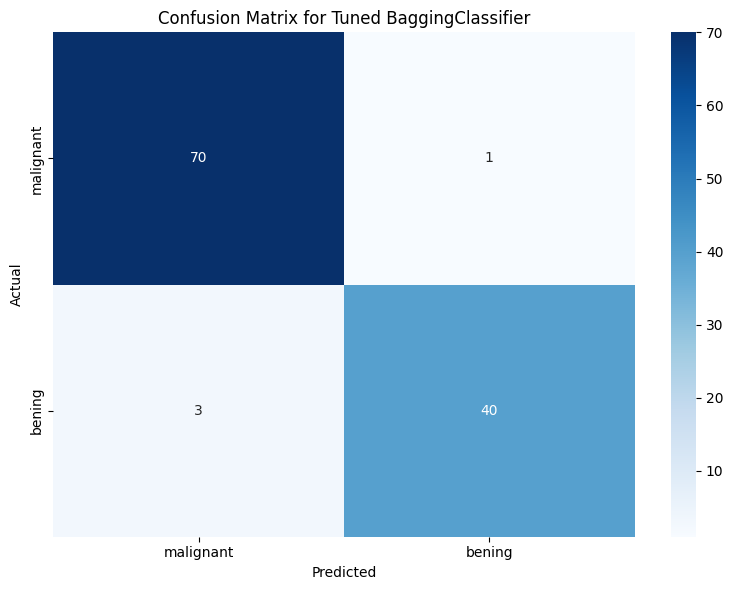

In [95]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, 
            yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Tuned BaggingClassifier')
plt.tight_layout()
plt.show()

In [98]:
# Visualize feature importance (if available)
if hasattr(best_bag_clf, 'feature_importances_'):
    feature_importances = best_bag_clf.feature_importances_
    feature_names = feature_names.columns
    
    # Get top 10 features
    indices = np.argsort(feature_importances)[::-1][:10]
    
    plt.figure(figsize=(10, 6))
    plt.title('Top 10 Feature Importances')
    plt.bar(range(10), feature_importances[indices])
    plt.xticks(range(10), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Feature importances not available for this model")

Feature importances not available for this model


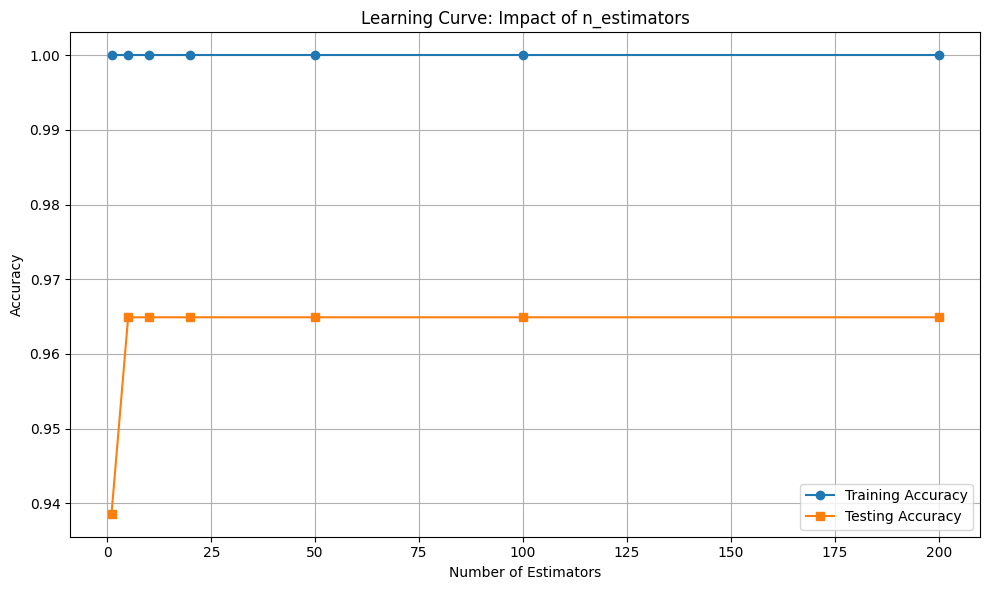

In [101]:
# Analyzing the impact of n_estimators
n_estimators_range = [1, 5, 10, 20, 50, 100, 200]
train_scores = []
test_scores = []

for n_estimators in n_estimators_range:
    # Create model with current n_estimators value
    bag = BaggingClassifier(
        estimator=DecisionTreeClassifier(max_depth=best_bag_clf.estimator_.max_depth),
        n_estimators=n_estimators,
        max_samples=best_bag_clf.max_samples,
        max_features=best_bag_clf.max_features,
        bootstrap=best_bag_clf.bootstrap,
        bootstrap_features=best_bag_clf.bootstrap_features,
        random_state=42
    )
    
    # Train model
    bag.fit(X_train_scaled, y_train)
    
    # Evaluate on train and test sets
    train_score = accuracy_score(y_train, bag.predict(X_train_scaled))
    test_score = accuracy_score(y_test, bag.predict(X_test_scaled))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy', marker='s')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Learning Curve: Impact of n_estimators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## GradientBoostingClassifier

In [102]:
# Set random seed for reproducibility
#np.random.seed(42)

# Load dataset (breast cancer dataset as an example)
#data = load_breast_cancer()
#X = data.data
#y = data.target
#feature_names = data.feature_names
#target_names = data.target_names

#print(f"Dataset shape: {X.shape}")
#print(f"Target distribution: {np.bincount(y)}")
#print(f"Features: {feature_names}")
#print(f"Classes: {target_names}")

# Split data into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

In [104]:
# 1. Basic model with default parameters
print("\n1. INITIAL MODEL WITH DEFAULT PARAMETERS")
model = pipeline
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))


1. INITIAL MODEL WITH DEFAULT PARAMETERS
Accuracy on test set: 0.9561

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.97      0.97        71
      bening       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [105]:
# 2. Hyperparameter tuning with GridSearchCV
print("\n2. HYPERPARAMETER TUNING")
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5],
    'classifier__min_samples_split': [2, 5],
    'classifier__subsample': [0.8, 1.0]
}

# For demonstration, we're using a smaller param_grid. In practice, you might use more values.
# You could also use RandomizedSearchCV for more efficient searching with a larger param space.

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


2. HYPERPARAMETER TUNING
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 4, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}
Best cross-validation score: 0.9692


In [106]:
# Get the best model
best_model = grid_search.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.2, max_depth=4,
                                            min_samples_split=5,
                                            random_state=42, subsample=0.8))])

In [107]:
# 3. Evaluate the optimized model
print("\n3. EVALUATING OPTIMIZED MODEL")
y_pred_best = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print(f"Accuracy on test set: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=target_names))


3. EVALUATING OPTIMIZED MODEL
Accuracy on test set: 0.9561

Classification Report:
              precision    recall  f1-score   support

   malignant       0.96      0.97      0.97        71
      bening       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [108]:
# 4. Visualizations

# 4.1 Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('bagging_confusion_matrix.png')
plt.close()

In [109]:
# 4.2 Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('bagging_roc_curve.png')
plt.close()

In [110]:
# 4.3 Plot feature importance
plt.figure(figsize=(12, 8))
feature_importance = best_model.named_steps['classifier'].feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of GradientBoostingClassifier')
plt.tight_layout()
plt.savefig('bagging_feature_importance.png')
plt.close()

In [111]:
# 4.4 Plot learning curves to analyze bias-variance tradeoff
def plot_learning_curve(estimator, X, y, title="Learning Curve", cv=5):
    plt.figure(figsize=(10, 6))
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig('bagging_learning_curve.png')
    plt.close()

plot_learning_curve(best_model, X, y, title="Learning Curve for GradientBoostingClassifier")

In [113]:
# 5. Early stopping example
print("\n4. GRADIENT BOOSTING WITH EARLY STOPPING")

# Create validation set
X_train_es, X_val, y_train_es, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Build model with early stopping
early_stopping_model = GradientBoostingClassifier(
    n_estimators=500,  # Set a large number, early stopping will determine the actual number used
    learning_rate=0.1,
    max_depth=4,
    validation_fraction=0.2,
    n_iter_no_change=10,  # Stop if no improvement after 10 iterations
    tol=1e-4,
    random_state=42,
    subsample=0.8
)

early_stopping_model.fit(X_train_es, y_train_es)

print(f"Number of estimators used (after early stopping): {early_stopping_model.n_estimators_}")
y_pred_es = early_stopping_model.predict(X_test)
print(f"Accuracy with early stopping: {accuracy_score(y_test, y_pred_es):.4f}")


4. GRADIENT BOOSTING WITH EARLY STOPPING
Number of estimators used (after early stopping): 37
Accuracy with early stopping: 0.9649


In [119]:
# 6. Track deviance (error) during training (stages)
test_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_test)):
    # Simply calculate error rate (1 - accuracy) for each iteration
    test_score[i] = 1.0 - accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 6))
# Get train scores
train_score = np.zeros((best_model.named_steps['classifier'].n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(best_model.named_steps['classifier'].staged_predict(X_train)):
    train_score[i] = 1.0 - accuracy_score(y_train, y_pred)

plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, train_score, 'b-',
         label='Training Set Error')
plt.plot(np.arange(best_model.named_steps['classifier'].n_estimators) + 1, test_score, 'r-',
         label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('Error Rate vs Boosting Iterations')
plt.tight_layout()
plt.savefig('bagging_deviance_plot.png')
plt.close()

In [120]:
# 7. Save the best model using joblib (uncomment if needed)
import joblib
joblib.dump(best_model, 'gradient_boosting_best_model.pkl')
print("\nBest model saved as 'gradient_boosting_best_model.pkl'")

print("\nGradient Boosting Classifier tuning complete!")


Best model saved as 'gradient_boosting_best_model.pkl'

Gradient Boosting Classifier tuning complete!


## HistGradientBoostingClassifier

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance
import seaborn as sns
from scipy.stats import randint, uniform

In [122]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic classification dataset
X, y = make_classification(
    n_samples=10000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    class_sep=0.8,
    random_state=42
)

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [124]:
# Create a baseline HistGradientBoostingClassifier with default parameters
base_model = HistGradientBoostingClassifier(random_state=42)
base_model.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [125]:
# Evaluate the baseline model
y_pred_base = base_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_base)

print(f"Baseline Model Accuracy: {base_accuracy:.4f}")
print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_base))

Baseline Model Accuracy: 0.9170

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1030
           1       0.92      0.91      0.91       970

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [126]:
# Define parameter grid for hyperparameter tuning
param_distributions = {
    'learning_rate': uniform(0.01, 0.3),
    'max_iter': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_leaf': randint(10, 50),
    'max_leaf_nodes': randint(20, 80),
    'l2_regularization': uniform(0, 10),
    'max_bins': randint(100, 255)
}

In [127]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=HistGradientBoostingClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,       # Cross-validation folds
    scoring='accuracy',
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1
)

In [128]:
# Perform hyperparameter tuning
print("\nPerforming hyperparameter tuning. This may take a while...")
random_search.fit(X_train, y_train)


Performing hyperparameter tuning. This may take a while...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'l2_regularization': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x127b6e350>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1253f12b0>,
                                        'max_bins': <scipy.stats._distn_infrastr...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127b6dbd0>,
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1253f2270>,
                                        'max_leaf_nodes': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x122fd6060>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x127b6e490>},
                   random_state=42, scoring='accuracy', verbose=1)

In [129]:
# Print best parameters and score
print("\nBest Parameters:", random_search.best_params_)
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")


Best Parameters: {'l2_regularization': 7.2900716804098735, 'learning_rate': 0.24138110400578372, 'max_bins': 104, 'max_depth': 12, 'max_iter': 280, 'max_leaf_nodes': 77, 'min_samples_leaf': 37}
Best Cross-Validation Accuracy: 0.9215


In [130]:
# Get the best model
best_model = random_search.best_estimator_
best_model

HistGradientBoostingClassifier(l2_regularization=7.2900716804098735,
                               learning_rate=0.24138110400578372, max_bins=104,
                               max_depth=12, max_iter=280, max_leaf_nodes=77,
                               min_samples_leaf=37, random_state=42)

In [131]:
# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"\nTuned Model Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement over baseline: {(tuned_accuracy - base_accuracy) * 100:.2f}%")

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.9250
Improvement over baseline: 0.80%

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1030
           1       0.92      0.92      0.92       970

    accuracy                           0.93      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000



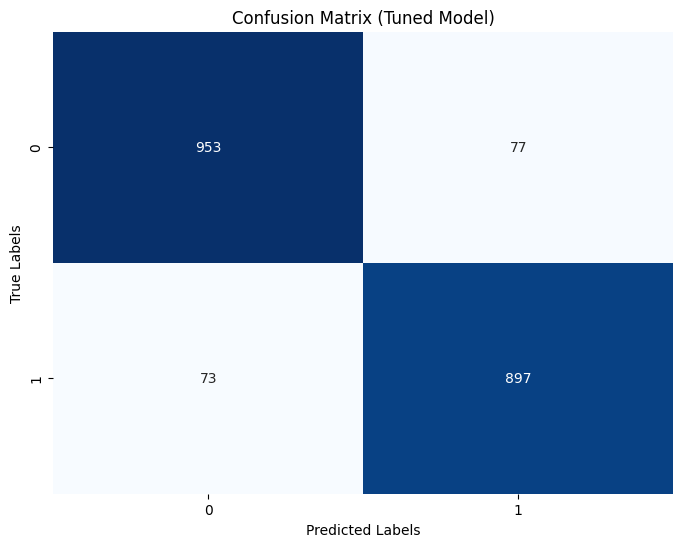

In [132]:
# Plot confusion matrix for the tuned model
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Tuned Model)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [133]:
# Calculate feature importance using permutation importance
perm_importance = permutation_importance(
    best_model, X_test, y_test, n_repeats=10, random_state=42
)

# Sort features by importance
feature_importance = pd.DataFrame({
    'Feature': [f'Feature {i}' for i in range(X.shape[1])],
    'Importance': perm_importance.importances_mean
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

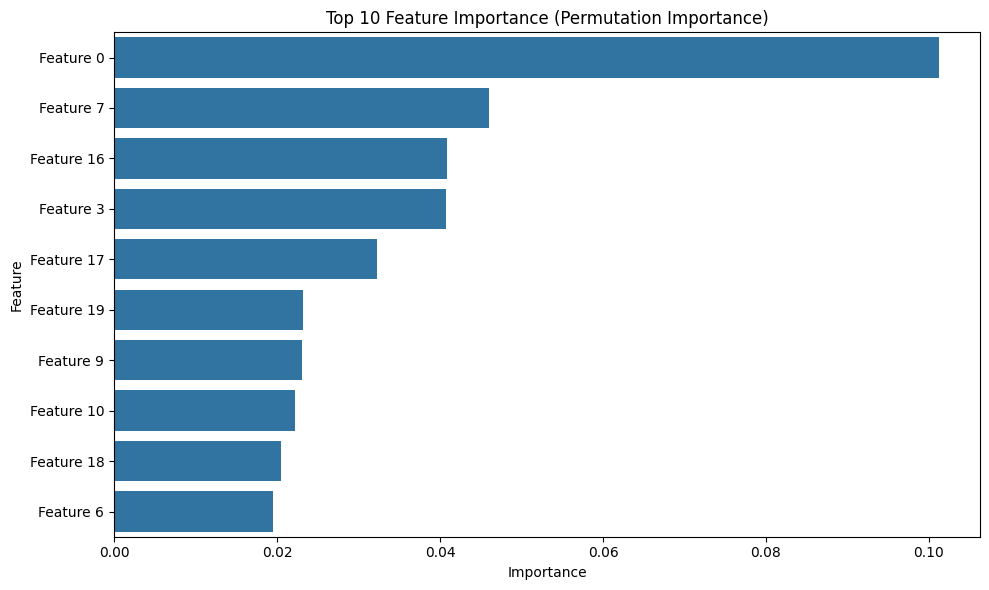

In [134]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance (Permutation Importance)')
plt.tight_layout()
plt.show()

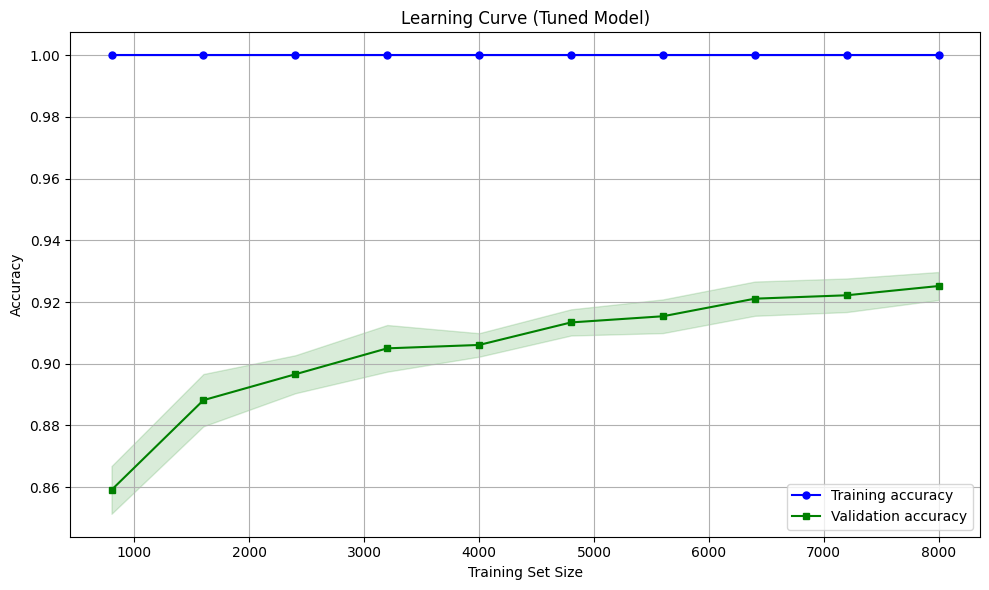

In [135]:
# Plot learning curves to assess overfitting
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve (Tuned Model)')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [136]:
# Example of saving and loading the model (commented out)
import joblib

# Save the model
joblib.dump(best_model, 'hist_gradient_boosting_model.pkl')

# Load the model
loaded_model = joblib.load('hist_gradient_boosting_model.pkl')

In [137]:
# Example of using the model for prediction on new data
# Simulate new data (same feature count as training data)
new_data = np.random.randn(5, X.shape[1])
predictions = best_model.predict(new_data)
probabilities = best_model.predict_proba(new_data)

print("\nExample Predictions on New Data:")
for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
    print(f"Sample {i+1}: Predicted class = {pred}, Probability = {prob[1]:.4f}")


Example Predictions on New Data:
Sample 1: Predicted class = 0, Probability = 0.0499
Sample 2: Predicted class = 1, Probability = 0.9836
Sample 3: Predicted class = 1, Probability = 0.6552
Sample 4: Predicted class = 1, Probability = 0.5153
Sample 5: Predicted class = 0, Probability = 0.0773


## Support Vector Machine

In [138]:
"""
Support Vector Machine Hyperparameter Tuning Example
====================================================

This script demonstrates how to:
1. Load and prepare data
2. Optimize SVM hyperparameters using GridSearchCV
3. Evaluate the best model's performance
4. Visualize decision boundaries (for 2D data)
"""

"\nSupport Vector Machine Hyperparameter Tuning Example\n====================================================\n\nThis script demonstrates how to:\n1. Load and prepare data\n2. Optimize SVM hyperparameters using GridSearchCV\n3. Evaluate the best model's performance\n4. Visualize decision boundaries (for 2D data)\n"

In [139]:
from sklearn.datasets import load_breast_cancer, make_classification

In [140]:
# Set random seed for reproducibility
np.random.seed(42)

In [147]:
def load_data(use_synthetic=False):
    """
    Load either real-world or synthetic dataset
    """
    if use_synthetic:
        # Create a synthetic dataset for visualization purposes (2D)
        X, y = make_classification(
            n_samples=300, 
            n_features=2,
            n_redundant=0, 
            n_informative=2,
            random_state=42,
            n_clusters_per_class=1
        )
        feature_names = [f'Feature {i+1}' for i in range(2)]
        target_names = ['Class 0', 'Class 1']
    else:
        # Load breast cancer dataset
        dataset = load_breast_cancer()
        X, y = dataset.data, dataset.target
        feature_names = dataset.feature_names
        target_names = dataset.target_names
    
    return X, y, feature_names, target_names

def create_svm_pipeline():
    """
    Create a pipeline with standardization and SVM
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True))
    ])
#Invalid parameter 'C' for estimator Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(probability=True))]) 
#Valid parameters are: ['memory', 'steps', 'transform_input', 'verbose']

def grid_search_svm(X_train, y_train):
    """
    Perform grid search to find the best SVM hyperparameters
    """
    # Create pipeline
    pipeline = create_svm_pipeline()
    
    # Define hyperparameter grid
    param_grid = {
        'svm__C': [0.1, 1, 10, 100],
        'svm__gamma': [0.001, 0.01, 0.1, 1],
        'svm__kernel': ['rbf', 'linear', 'poly']
    }
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(
        pipeline,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate model performance
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Generate classification report
    report = classification_report(y_test, y_pred)
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    return accuracy, report, conf_matrix

def visualize_decision_boundary(model, X, y, feature_names):
    """
    Visualize the decision boundary (only for 2D data)
    """
    if X.shape[1] != 2:
        print("Decision boundary visualization requires 2D data")
        return
    
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict class labels for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary and data points
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title("SVM Decision Boundary")
    plt.colorbar(scatter, label='Class')
    plt.tight_layout()
    plt.savefig('svm_decision_boundary.png')
    plt.close()

In [148]:
def visualize_hyperparameter_performance(grid_search):
    """
    Visualize the performance of different hyperparameter combinations
    """
    # Extract results into a DataFrame
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Create a pivot table for C and gamma (for rbf kernel)
    rbf_results = results[results['param_svm__kernel'] == 'rbf'].copy()
    
    if not rbf_results.empty:
        pivot_table = rbf_results.pivot_table(
            index='param_svm__gamma', 
            columns='param_svm__C',
            values='mean_test_score'
        )
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(pivot_table, annot=True, cmap='viridis')
        plt.title('SVM Hyperparameter Performance (RBF Kernel)')
        plt.xlabel('C')
        plt.ylabel('Gamma')
        plt.tight_layout()
        plt.savefig('svm_hyperparameter_performance.png')
        plt.close()

     # Compare kernel performance
        kernel_performance = results.groupby('param_svm__kernel')['mean_test_score'].mean()
    
        plt.figure(figsize=(8, 6))
        kernel_performance.plot(kind='bar')
        plt.title('Average Performance by Kernel Type')
        plt.xlabel('Kernel')
        plt.ylabel('Mean CV Score')
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.savefig('svm_kernel_performance.png')
        plt.close()

In [149]:
def main():
    # Load data (set use_synthetic=True for 2D visualization)
    X, y, feature_names, target_names = load_data(use_synthetic=False)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    print(f"Dataset shape: {X.shape}")
    print(f"Number of classes: {len(np.unique(y))}")
    
    # Perform grid search
    print("Starting grid search...")
    grid_search = grid_search_svm(X_train, y_train)
    
    # Get the best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print("\nBest parameters found:")
    for param, value in best_params.items():
        print(f"{param}: {value}")
    
    # Evaluate model
    accuracy, report, conf_matrix = evaluate_model(best_model, X_test, y_test)
    
    print(f"\nTest accuracy: {accuracy:.4f}")
    print("\nClassification report:")
    print(report)
    
    print("\nConfusion matrix:")
    print(conf_matrix)
    
    # Visualize hyperparameter performance
    visualize_hyperparameter_performance(grid_search)
    
    # If using 2D data, visualize decision boundary
    if X.shape[1] == 2:
        visualize_decision_boundary(best_model, X, y, feature_names)
        print("\nDecision boundary visualized and saved as 'svm_decision_boundary.png'")
    
    # For additional analysis, let's use a different dataset to demonstrate decision boundary
    if X.shape[1] != 2:
        print("\nCreating 2D synthetic dataset for decision boundary visualization...")
        X_2d, y_2d, feature_names_2d, _ = load_data(use_synthetic=True)
        
        # Create and train a simplified model for visualization
        pipeline_2d = create_svm_pipeline()
        # Properly set parameters for pipeline components
        pipeline_2d.set_params(**{k: v for k, v in best_params.items()})
        pipeline_2d.fit(X_2d, y_2d)
        
        # Visualize the decision boundary
        visualize_decision_boundary(pipeline_2d, X_2d, y_2d, feature_names_2d)
        print("Decision boundary visualized and saved as 'svm_decision_boundary.png'")

if __name__ == "__main__":
    main()

Dataset shape: (569, 30)
Number of classes: 2
Starting grid search...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best parameters found:
svm__C: 0.1
svm__gamma: 0.001
svm__kernel: linear

Test accuracy: 0.9825

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Confusion matrix:
[[41  2]
 [ 0 71]]

Creating 2D synthetic dataset for decision boundary visualization...
Decision boundary visualized and saved as 'svm_decision_boundary.png'
